# DPLYR Package 

## Important Functions
1. [Select()](#Select)
2. [Filter()](#Filter)
3. [Arrange()](#Arrange)
4. [Rename()](#Rename)
5. [Mutate()](#Mutate)
6. [Group_by()](#Group_by)
7. [%>%](#%>%)

In [23]:
search()

[1] ".GlobalEnv"        "package:dplyr"     "jupyter:irkernel" 
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"

In [24]:
library(dplyr)

In [25]:
chi=readRDS("chicago.rds")

In [26]:
dplyr::glimpse(chi)

Observations: 6,940
Variables: 8
$ city       <chr> "chic", "chic", "chic", "chic", "chic", "chic", "chic", ...
$ tmpd       <dbl> 31.5, 33.0, 33.0, 29.0, 32.0, 40.0, 34.5, 29.0, 26.5, 32...
$ dptp       <dbl> 31.500, 29.875, 27.375, 28.625, 28.875, 35.125, 26.750, ...
$ date       <date> 1987-01-01, 1987-01-02, 1987-01-03, 1987-01-04, 1987-01...
$ pm25tmean2 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ pm10tmean2 <dbl> 34.00000, NA, 34.16667, 47.00000, NA, 48.00000, 41.00000...
$ o3tmean2   <dbl> 4.250000, 3.304348, 3.333333, 4.375000, 4.750000, 5.8333...
$ no2tmean2  <dbl> 19.98810, 23.19099, 23.81548, 30.43452, 30.33333, 25.772...


In [27]:
head(chi)

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


In [28]:
dim(chi)

[1] 6940    8

In [29]:
str(chi)

'data.frame':	6940 obs. of  8 variables:
 $ city      : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd      : num  31.5 33 33 29 32 40 34.5 29 26.5 32.5 ...
 $ dptp      : num  31.5 29.9 27.4 28.6 28.9 ...
 $ date      : Date, format: "1987-01-01" "1987-01-02" ...
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


## Select

In [30]:
chi1=select(chi,city:date)
head(chi1)

city,tmpd,dptp,date
chic,31.5,31.500,1987-01-01
chic,33.0,29.875,1987-01-02
chic,33.0,27.375,1987-01-03
chic,29.0,28.625,1987-01-04
chic,32.0,28.875,1987-01-05
chic,40.0,35.125,1987-01-06


In [31]:
chis=select(chi,1:5)
head(chis)

city,tmpd,dptp,date,pm25tmean2
chic,31.5,31.500,1987-01-01,NA
chic,33.0,29.875,1987-01-02,NA
chic,33.0,27.375,1987-01-03,NA
chic,29.0,28.625,1987-01-04,NA
chic,32.0,28.875,1987-01-05,NA
chic,40.0,35.125,1987-01-06,NA


In [32]:
chis=select(chi,-(tmpd:date))
head(chis)

city,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,NA,34.00000,4.250000,19.98810
chic,NA,NA,3.304348,23.19099
chic,NA,34.16667,3.333333,23.81548
chic,NA,47.00000,4.375000,30.43452
chic,NA,NA,4.750000,30.33333
chic,NA,48.00000,5.833333,25.77233


In [33]:
chis=select(chi,ends_with("2"))
head(chis)

pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
NA,34.00000,4.250000,19.98810
NA,NA,3.304348,23.19099
NA,34.16667,3.333333,23.81548
NA,47.00000,4.375000,30.43452
NA,NA,4.750000,30.33333
NA,48.00000,5.833333,25.77233


In [34]:
chis=select(chi,-starts_with("d"))
head(chis)

city,tmpd,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,NA,34.00000,4.250000,19.98810
chic,33.0,NA,NA,3.304348,23.19099
chic,33.0,NA,34.16667,3.333333,23.81548
chic,29.0,NA,47.00000,4.375000,30.43452
chic,32.0,NA,NA,4.750000,30.33333
chic,40.0,NA,48.00000,5.833333,25.77233


## Filter

In [35]:
chif=filter(chi,pm25tmean2>30)
print("Before")
summary(chi$pm25tmean2)
print("After")
summary(chif$pm25tmean2)

[1] "Before"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.70    9.70   14.66   16.23   20.60   61.50    4447 

[1] "After"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.05   32.12   35.04   36.63   39.53   61.50 

In [36]:
chif=filter(chi,pm25tmean2>30 & tmpd>80)
print("Before")
dim(chi)
print("After")
dim(chif)

[1] "Before"


[1] 6940    8

[1] "After"


[1] 17  8

## Arrange

In [37]:
chia=arrange(chi,tmpd)
print("Before")
head(chi)
tail(chi)
print("After")
head(chia)
tail(chia)

[1] "Before"


city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
6935,chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944
6936,chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000
6937,chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563
6938,chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222
6939,chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556
6940,chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000


[1] "After"


city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,-16.0,-25.625,1994-01-18,NA,27.00000,14.656250,22.10236
chic,-12.0,-18.875,1996-02-03,NA,25.61538,7.736111,30.13542
chic,-10.5,-23.125,1994-01-15,NA,36.00000,12.010417,24.70139
chic,-10.5,-21.000,1996-02-02,NA,35.00000,9.555556,31.47917
chic,-8.0,-2.375,1994-01-19,NA,24.50000,4.864583,36.59796
chic,-6.5,-15.750,1988-01-05,NA,24.00000,13.166667,17.22083


,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
6935,chic,89.5,70.375,1988-08-02,NA,67.0,49.849487,25.91973
6936,chic,90.0,77.100,1999-07-30,NA,54.0,34.170652,27.47977
6937,chic,90.0,70.900,2005-07-24,22.0500,44.0,47.604167,11.96354
6938,chic,91.5,75.625,1995-07-14,NA,54.5,52.003972,24.77355
6939,chic,92.0,76.375,1995-07-13,NA,92.5,58.549524,27.31775
6940,chic,NA,22.900,2003-03-01,47.7375,47.5,9.416667,37.44444


In [38]:
chia=arrange(chi,desc(date))
head(chi)
head(chia)

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000
chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556
chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222
chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563
chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000
chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944


## Rename

In [39]:
chir=rename(chi,dew=dptp,temp=tmpd,pm25=pm25tmean2)
head(chi)
head(chir)

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


city,temp,dew,date,pm25,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


## Mutate

In [40]:
chim=mutate(chir,pmdev=pm25-mean(pm25,na.rm=TRUE))
tail(chir)
tail(chim)

,city,temp,dew,date,pm25,pm10tmean2,o3tmean2,no2tmean2
6935,chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944
6936,chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000
6937,chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563
6938,chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222
6939,chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556
6940,chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000


,city,temp,dew,date,pm25,pm10tmean2,o3tmean2,no2tmean2,pmdev
6935,chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944,-7.830958
6936,chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000,7.329042
6937,chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563,1.519042
6938,chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222,-8.780958
6939,chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556,-1.173815
6940,chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000,-1.230958


In [41]:
chim=transmute(chir,pmdev=pm25-mean(pm25,na.rm=TRUE))
tail(chir)
tail(chim)

,city,temp,dew,date,pm25,pm10tmean2,o3tmean2,no2tmean2
6935,chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944
6936,chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000
6937,chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563
6938,chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222
6939,chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556
6940,chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000


,pmdev
6935,-7.830958
6936,7.329042
6937,1.519042
6938,-8.780958
6939,-1.173815
6940,-1.230958


## Group_by

In [61]:
Sys.time()

[1] "2016-09-05 12:06:24 IST"

In [70]:
chig=mutate(chi, year=as.POSIXlt(date)$year+1900)
head(chi)
head(chig)
cat("======================================================================================================")
tail(chi)
tail(chig)

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,year
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,1987
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,1987
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,1987
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,1987
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,1987
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,1987


,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
6935,chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944
6936,chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000
6937,chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563
6938,chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222
6939,chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556
6940,chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000


,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,year
6935,chic,35,29.6,2005-12-26,8.40000,8.5,14.041667,16.81944,2005
6936,chic,40,33.6,2005-12-27,23.56000,27.0,4.468750,23.50000,2005
6937,chic,37,34.5,2005-12-28,17.75000,27.5,3.260417,19.28563,2005
6938,chic,35,29.4,2005-12-29,7.45000,23.5,6.794837,19.97222,2005
6939,chic,36,31.0,2005-12-30,15.05714,19.2,3.034420,22.80556,2005
6940,chic,35,30.1,2005-12-31,15.00000,23.5,2.531250,13.25000,2005


city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2,year
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,1987
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,1987
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,1987
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,1987
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,1987
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,1987


year,meanT
1987,52.12603
1988,49.93579
1989,48.36712
1990,51.67260
1991,51.40274
1992,48.81148
1993,48.71918
1994,50.08219
1995,50.20959
1996,47.39481


year,meanT,maxT,minT
1987,52.12603,87.0,2.0
1988,49.93579,89.5,-6.5
1989,48.36712,86.5,-6.5
1990,51.67260,86.5,3.5
1991,51.40274,88.0,6.5
1992,48.81148,80.0,5.5
1993,48.71918,84.0,5.0
1994,50.08219,86.0,-16.0
1995,50.20959,92.0,0.5
1996,47.39481,83.0,-12.0


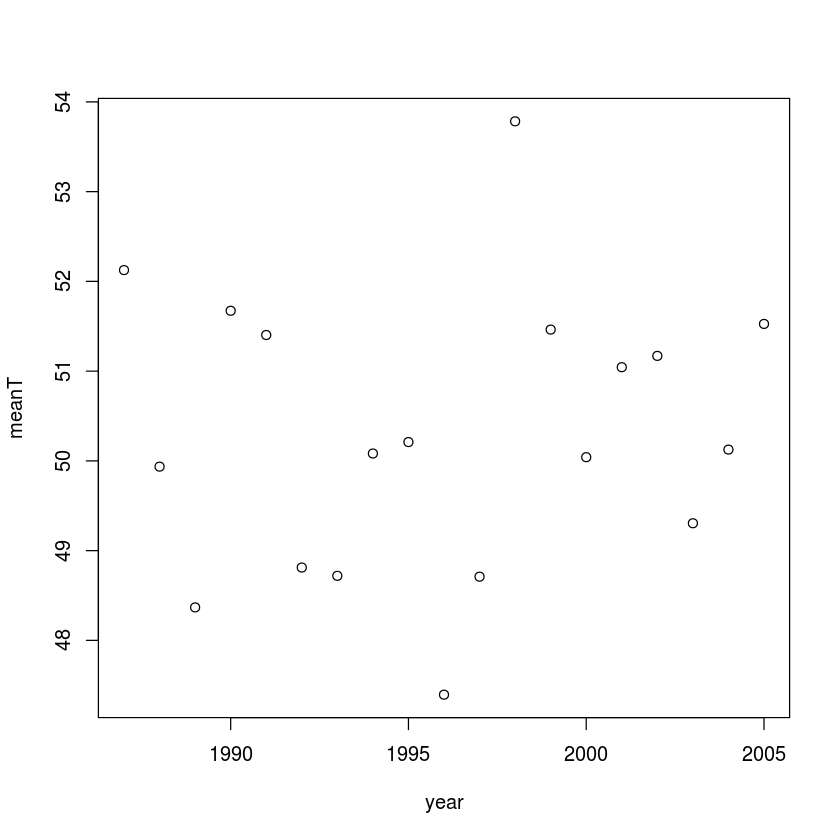

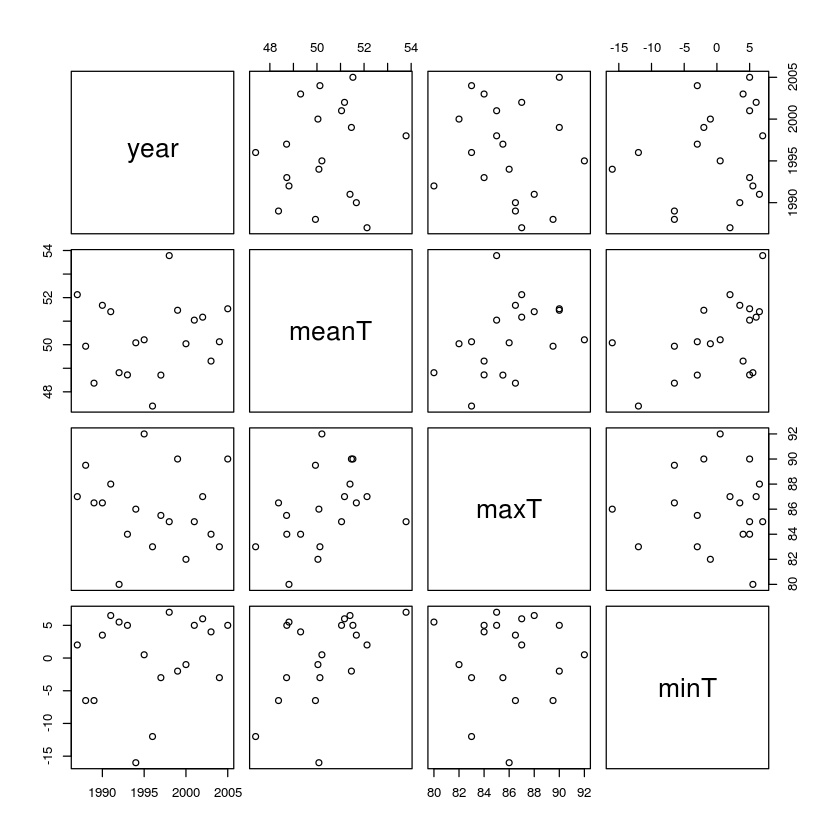

In [106]:
chigy=group_by(chig,year)
head(chig)
chigs=summarize(chigy,meanT=mean(tmpd,na.rm=T))
plot(chigs)
chigs
chigs2=summarize(chigy,meanT=mean(tmpd,na.rm=T),maxT=max(tmpd,na.rm=T),minT=min(tmpd,na.rm=T))
chigs2
plot(chigs2)